# Composition of Compound Planetary Gear Set

In [5]:
# Composition of Compound Planetary Gear Set

# Inputs for Calculations
TYPE = 1; # Flag of type for Compound/Simple : 1 or 0
alpha = 20.0; # Pressure Angle [deg]
m1 = 1.0; # Module1
m2 = 1.5; # Module2 (No need for Compound)
Np = 3;  # Planets Number
Ds = 18.0; # Dia Sun
Dp1 = 45.0; # Dia Planet1
Dp2 = 18.0; # Dia Planet2 (No need for Compound)

# Inputs for Plots
MarkerSize=3;
ColorCross="#c4c7cb"
ColorSun="#2471a3"
ColorPlanet1="#7fb3d5"
ColorRing1="#a9cce3"
ColorPlanet2="#6e2c00" # (No need for Compound)
ColorRing2="#d35400" # (No need for Compound)
PlotSize=600;
PlotTicks=15;
TextPos=1.1;
TextSize=7;

In [6]:
# Calc
Dc = Ds+Dp1; # Dia Carrier
Dr1 = Ds+2*Dp1; # Dia Ring1
Gp1s = Dp1/Ds; # Ratio of Planet1-Sun
Zs = round(Int32,Ds/m1);
Zp1 = round(Int32,Dp1/m1);
Zr1 = round(Int32,Dr1/m1);
if TYPE==1
    Dr2 = Dc+Dp2; # Dia Ring2
    Gr2p2 = Dr2/Dp2; # Ratio of Ring-Planet2
    G1 = 1+Gr2p2*Gp1s; # Ratio Total (Carrier Output)
    G2 = Gr2p2*Gp1s; # Ratio Total (Ring Output)
    Ds2 = Dc-2*Dp2;
    Zs2 = Ds2/m2
    Zp2 = round(Int32,Dp2/m2);
    Zr2 = round(Int32,Dr2/m2);
else
    G3 = 1+Zr1/Zs; # Ratio Total (Carrier Output)
    G4 = Zr1/Zs; # Ratio Total (Ring1 Output)
end

# Output
if TYPE==1
    print("##### Compound Planetary Gear Set\n\n")
    print("### Ratio\n")
    print("Ratio (Sun-Planet1) = ",Gp1s,"\n")
    print("Ratio (Planet2-Ring2) = ",Gr2p2,"\n")
    print("Ratio (Total, Carrier Output) = ",G1,"\n")
    print("Ratio (Total, Ring2 Output) = ",G2,"\n\n")
    print("### Size\n")
    print("Sun = ",Ds," [mm],  ",Zs," [ea]\n")
    print("Planet1 = ",Dp1," [mm],  ",Zp1," [ea]\n")
    print("Ring1 = ",Dr1," [mm],  ",Zr1," [ea]\n")
    print("Planet2 = ",Dp2," [mm],  ",Zp2," [ea]\n")
    print("Ring2 = ",Dr2," [mm],  ",Zr2," [ea]\n")
else
    print("##### Simple Planetary Gear Set\n\n")
    print("### Ratio\n")
    print("Ratio (Sun-Planet1) = ",Gp1s,"\n")
    print("Ratio (Total, Carrier Output) = ",G3," (1-stage),  ",G3^2," (2-stages),  ",G3^3," (3-stages)\n")
    print("Ratio (Total, Ring1 Output) = ",G4," (1-stage),  ",G4^2," (2-stages),  ",G4^3," (3-stages)\n\n")
    print("### Size\n")
    print("Sun = ",Ds," [mm],  ",Zs," [ea]\n")
    print("Planet1 = ",Dp1," [mm],  ",Zp1," [ea]\n")
    print("Ring1 = ",Dr1," [mm],  ",Zr1," [ea]\n")
end

##### Compound Planetary Gear Set

### Ratio
Ratio (Sun-Planet1) = 2.5
Ratio (Planet2-Ring2) = 4.5
Ratio (Total, Carrier Output) = 12.25
Ratio (Total, Ring2 Output) = 11.25

### Size
Sun = 18.0 [mm],  18 [ea]
Planet1 = 45.0 [mm],  45 [ea]
Ring1 = 108.0 [mm],  108 [ea]
Planet2 = 18.0 [mm],  12 [ea]
Ring2 = 81.0 [mm],  54 [ea]


In [7]:
# Checks
print("### Checks\n")

### 모듈이 기어 이빨개수가 정수로 떨어지도록 결정 되었는지 확인
## Check Module 1
print("# Module1 (m1) : ")
if Ds%m1==0 && Dp1%m1==0 print("OK\n") else print("Fail\n") end

## Check Module 2
if TYPE==1
    print("# Module2 (m2) : ")
    if Dp2%m2==0 && Dr2%m2==0 print("OK\n") else print("Fail\n") end
end

### 각각의 유성기어와 썬기어의 맞물림 순간의 치접촉 형태가 각각 다른지 확인
### 진동이 더 적게 발생하도록 하는 조건 (선택사항)
## Sequential Mesh Condition (Non-Factorizing) 1
print("# Sequential Mesh Condition (Non-Factorizing, Not Required) 1 : ")
if (Zs%Np)!=0 && (Zr1%Np)!=0 print("Good\n") else print("No good\n") end

## Sequential Mesh Condition (Non-Factorizing) 2
if TYPE==1
    print("# Sequential Mesh Condition (Non-Factorizing, Not Required) 2 : ")
    if (Zs2%Np)!=0 && (Zr2%Np)!=0 print("Good\n") else print("No good\n") end
end

### 등간격 배치조건
### 유성기어가 일정한 간격을 두고 배치되어야 함
## Check Planets Numbers (Equal Distance Condition) 1
print("# Planet Numbers (Equal Distance Condition) 1 : ")
if (Zs+Zr1)%Np==0 print("OK\n") else print("Fail\n") end

## Check Planets Numbers (Equal Distance Condition) 2
print("# Planet Numbers (Equal Distance Condition) 2 : ")
if TYPE==1
    if (Zs2+Zr2)%Np==0 print("OK\n") else print("Fail\n") end
end

### 중첩 방지 조건
### 유성기어 사이에 중첩이 없어야 함
## Check Planets Interference (Non-Overlap Condition) 1
print("# Planets Interference (Non-Overlap Condition) 1 : ")
if alpha==20 && Np<(pi/asin((Zp1+2)/(Zp1+Zs))) print("OK\n") else print("Fail\n") end

## Check Planets Interference (Non-Overlap Condition) 2
if TYPE==1
    print("# Planets Interference (Non-Overlap Condition) 2 : ")
    if alpha==20 && Np<(pi/asin((Zp2+2)/(Zp2+Zs2))) print("OK\n") else print("Fail\n") end
end
if alpha!=20 print("No Check (Non-Standard) \n") end

### 인볼류트 간섭조건
### 유성기어의 잇수가 작을 때, 유성기어의 이뿌리가 링기어의 이끝과 간섭을 일으킬 수 있음
## Check Involute Interference Condition 1
print("# Involute Interference Condition 1 : ")
temp=(Zp1*sin(deg2rad(alpha)))^2;
temp2 = (temp-4)/(2*temp-4);
if alpha==20 && Zr1>=temp2 print("OK\n") else print("Fail\n") end

## Check Involute Interference Condition 2
if TYPE==1
    print("# Involute Interference Condition 2 : ")
    temp=(Zp2*sin(deg2rad(alpha)))^2;
    temp2 = (temp-4)/(2*temp-4);
    if alpha==20 && Zr2>=temp2 print("OK\n") else print("Fail\n") end
end
if alpha!=20 print("No Check (Non-Standard) \n") end

### 트리밍 간섭조건
### 링기어에 유성기어를 조립할 때, 중심에서 외곽으로 끼워넣는 경우 간섭 발생 여부
### 트리밍 간섭을 피하기 위해서는 +방향 전위를 주면 유리함
## Check Trimming Interference 1
print("# Trimming Interference 1 : ")
if alpha==20 && (Zr1-Zp1)>=16 print("OK\n") else print("Fail\n") end

## Check Trimming Interference 2
if TYPE==1
    print("# Trimming Interference 2 : ")
    if alpha==20 && (Zr2-Zp2)>=16 print("OK\n") else print("Fail\n") end
end
if alpha!=20 print("No Check (Non-Standard) \n") end

### Checks
# Module1 (m1) : OK
# Module2 (m2) : OK
# Sequential Mesh Condition (Non-Factorizing, Not Required) 1 : No good
# Sequential Mesh Condition (Non-Factorizing, Not Required) 2 : No good
# Planet Numbers (Equal Distance Condition) 1 : OK
# Planet Numbers (Equal Distance Condition) 2 : OK
# Planets Interference (Non-Overlap Condition) 1 : OK
# Planets Interference (Non-Overlap Condition) 2 : OK
# Involute Interference Condition 1 : OK
# Involute Interference Condition 2 : OK
# Trimming Interference 1 : OK
# Trimming Interference 2 : OK


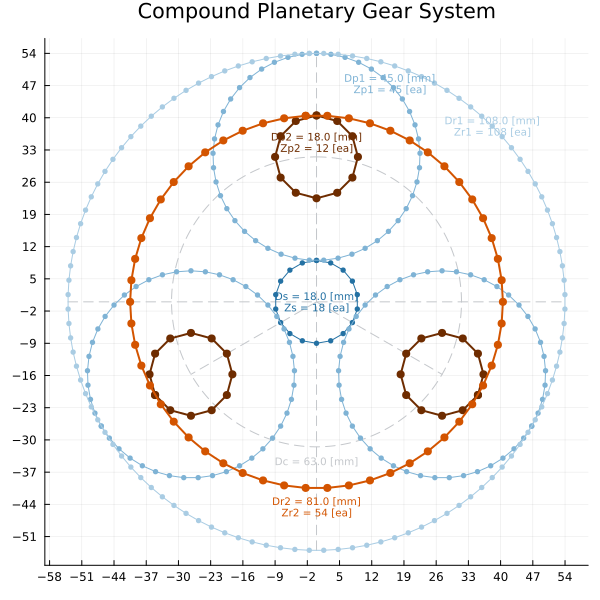

In [8]:
using Plots

# Plots
if TYPE==1 TITLE="Compound Planetary Gear System" else TITLE="Simple Planetary Gear System" end
p=plot(aspect_ratio=:equal,legend=false,size=(PlotSize,PlotSize),
    xticks=[-2*Dp1+Ds:round((2*Dp1+Ds)/PlotTicks):2*Dp1+Ds;],yticks=[-2*Dp1+Ds:round((2*Dp1+Ds)/PlotTicks):2*Dp1+Ds;],
    title=TITLE)

# Center Cross
plot!([0, 0],[-Dr1/2, Dr1/2],color=ColorCross,linestyle=:dash)
plot!([-Dr1/2, Dr1/2],[0, 0],color=ColorCross,linestyle=:dash)

# Carrier
tc=[0:0.01:2*pi;]
Xc=(Dc/2)*sin.(tc)
Yc=(Dc/2)*cos.(tc)
plot!(p,Xc,Yc,color=ColorCross,linestyle=:dash)

# Centers on Carrier
Xcc=[0]
Ycc=[Dc/2]
for i in [1:Np;]
    Xcc = [Xcc Xcc[1]*cos(2*pi*(i/Np)).-Ycc[1]*sin(2*pi*(i/Np))]
    Ycc = [Ycc Xcc[1]*sin(2*pi*(i/Np)).+Ycc[1]*cos(2*pi*(i/Np))]
    plot!(p,[0,Xcc[i+1]],[0,Ycc[i+1]],color=ColorCross,linestyle=:dash)
end
annotate!(0,TextPos*(-Dc/2),Plots.text("Dc = $Dc [mm]",ColorCross,:center,TextSize))

# Sun
ts=[0:2*pi/Zs:2*pi;]
Xs=(Ds/2)*sin.(ts)
Ys=(Ds/2)*cos.(ts)
Xs2=Xs
Ys2=Ys
if !isodd(Zp1)
    Xs2 = Xs*cos(2*pi/(Zs*2)).-Ys*sin(2*pi/(Zs*2))
    Ys2 = Xs*sin(2*pi/(Zs*2)).+Ys*cos(2*pi/(Zs*2))
end
plot!(p,Xs2,Ys2,color=ColorSun)
scatter!(p,Xs2,Ys2,markercolor=ColorSun,markersize=MarkerSize*m1,markerstrokewidth=0)
annotate!(0,0,Plots.text("Ds = $Ds [mm]\nZs = $Zs [ea]",ColorSun,:center,TextSize))

# Planet1
tp1=[0:2*pi/Zp1:2*pi;]
Xp1=(Dp1/2)*sin.(tp1)
Yp1=(Dp1/2)*cos.(tp1).+(Dc/2);
for i in [1:Np;]
    Xp1 = [Xp1 Xp1[:,1]*cos(2*pi*(i/Np)).-Yp1[:,1]*sin(2*pi*(i/Np))]
    Yp1 = [Yp1 Xp1[:,1]*sin(2*pi*(i/Np)).+Yp1[:,1]*cos(2*pi*(i/Np))]
    plot!(p,Xp1[:,i],Yp1[:,i],color=ColorPlanet1)
    scatter!(p,Xp1[:,i],Yp1[:,i],markercolor=ColorPlanet1,markersize=MarkerSize*m1,markerstrokewidth=0)
end
annotate!(((Dp1/2)*cos(pi/4)),Dc/2+(Dp1/2)*sin(pi/4),
    Plots.text("Dp1 = $Dp1 [mm]\nZp1 = $Zp1 [ea]",ColorPlanet1,:center,TextSize))

# Ring1
tr1=[0:2*pi/Zr1:2*pi;]
Xr1=(Dr1/2)*sin.(tr1)
Yr1=(Dr1/2)*cos.(tr1)
Xr12=Xr1
Yr12=Yr1
Xr12 = Xr1*cos(2*pi/(Zr1*2)).-Yr1*sin(2*pi/(Zr1*2))
Yr12 = Xr1*sin(2*pi/(Zr1*2)).+Yr1*cos(2*pi/(Zr1*2))
plot!(p,Xr12,Yr12,color=ColorRing1)
scatter!(p,Xr12,Yr12,markercolor=ColorRing1,markersize=MarkerSize*m1,markerstrokewidth=0)
annotate!((Dr1/2)*cos(pi/4),(Dr1/2)*sin(pi/4),
    Plots.text("Dr1 = $Dr1 [mm]\nZr1 = $Zr1 [ea]",ColorRing1,:center,TextSize))

# Planet2
if TYPE==1
    tp2=[0:2*pi/Zp2:2*pi;]
    Xp2=(Dp2/2)*sin.(tp2)
    Yp2=(Dp2/2)*cos.(tp2).+(Dc/2)
    for i in [1:Np;]
        Xp2 = [Xp2 Xp2[:,1]*cos(2*pi*(i/Np)).-Yp2[:,1]*sin(2*pi*(i/Np))]
        Yp2 = [Yp2 Xp2[:,1]*sin(2*pi*(i/Np)).+Yp2[:,1]*cos(2*pi*(i/Np))]
        plot!(p,Xp2[:,i],Yp2[:,i],color=ColorPlanet2,linewidth=2)
        scatter!(p,Xp2[:,i],Yp2[:,i],markercolor=ColorPlanet2,markersize=MarkerSize*m2,markerstrokewidth=0)
    end
    annotate!(0,TextPos*(Dc/2),Plots.text("Dp2 = $Dp2 [mm]\nZp2 = $Zp2 [ea]",ColorPlanet2,:center,TextSize))
end

# Ring2
if TYPE==1
    tr2=[0:2*pi/Zr2:2*pi;]
    Xr2=(Dr2/2)*sin.(tr2)
    Yr2=(Dr2/2)*cos.(tr2)
    Xr22=Xr2
    Yr22=Yr2
    Xr22 = Xr2*cos(2*pi/(Zr2*2)).-Yr2*sin(2*pi/(Zr2*2))
    Yr22 = Xr2*sin(2*pi/(Zr2*2)).+Yr2*cos(2*pi/(Zr2*2))
    plot!(p,Xr22,Yr22,color=ColorRing2,linewidth=2)
    scatter!(p,Xr22,Yr22,markercolor=ColorRing2,markersize=MarkerSize*m2,markerstrokewidth=0)
    annotate!(0,TextPos*(-Dr2/2),Plots.text("Dr2 = $Dr2 [mm]\nZr2 = $Zr2 [ea]",ColorRing2,:center,TextSize))
end

# Show
display(p)